## Scaling of Semantic Diversity in Cities

In this notebook we will calculate measures for states and cities and see how they scale.

In [5]:
import csv
import json
import operator

In [2]:
import numpy as np

In [3]:
def read_vectors(file_name):
    line = open(file_name, "r")
    for l in line:
        d = eval(l)
    return d

In [4]:
research_cities = read_vectors("../saved_data_structures/research_vectors_cities_cleaned.txt")

In [6]:
research_orgs = read_vectors("../saved_data_structures/research_vectors_orgs_cleaned.txt")

In [7]:
teaching_cities = read_vectors("../saved_data_structures/teaching_vectors_cities_cleaned.txt")

In [8]:
teaching_orgs = read_vectors("../saved_data_structures/teaching_vectors_orgs_cleaned.txt")

In [9]:
import string

In [10]:
def convertabrv(entity, city=False):
    """
    converts uni/city into non abbreviated form.
    """
    stop_words = ['of', 'the', 'at', 'and']
    replace = {'univ':'university', 'res':'research', 'med':'medical', 'coll':'college', 'ctr':'center', 'jr':'junior',
               'inst':'institute', 'nat':'natural', 'htlh':'health', 'calif':'california', 'sci':'science', 'adv':'advanced',
               'ut':'university texas', 'n':'north', 's':'south', 'e': 'east', 'w': 'west', 'natl':'national',
               'uc':'university california', 'pk':'park', 'ft':'fort', 'so':'southern', 'no':'northern', 'syst':'system',
               'technol':'technology', 'penn':'pennsylvania', 'hosp':'hospital', 'clin':'clinic', 'mt':'mount',
               'biomed':'biomedical', 'canc':'cancer', 'nw':'northwestern', 'cuny':'city university new york',
                'suny':'state university new york', 'unc':'university north carolina', 'mit':'massachusetts institute technology',
               'caltech':'california institute technology', 'gen':'general', 'nyu':'new york university',
               'iit':'illionis institute technology', 'inc':'incorporated', 'fdn':'foundation'}
    stop_chars = ['-']
    remove_chars = ['&']
    entity_ = entity.lower()
    
    for chars in stop_chars:
        entity_ = entity_.replace(chars, " ")
    
    for chars in remove_chars:
        entity_ = entity_.replace(chars, "")
    
    for word in replace:
        entity_ = re.sub(r'\b%s\b' % word, replace[word], entity_)
    
    for word in stop_words:
        entity_ = re.sub(r'\b%s\b' % word, " ", entity_)
    
    entity_ = entity_.strip()
    entity_ = re.sub(' +', ' ', entity_)
    
    if city:
        return(string.capwords(entity_))
    
    return entity_

In [11]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

In [12]:
def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    if v1 is None or v2 is None:
        return (None, None)
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    cos = np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)
    return np.arccos(cos)*57.2958 , cos

In [13]:
reader = csv.reader(open("../saved_data_structures/city_unis.csv"))

In [14]:
len(research_cities)

7559

In [15]:
cities = {}

In [16]:
for k,v in reader:
    cities[k] = eval(v)

In [17]:
len(cities)

1284

In [18]:
list(research_cities.keys())[0:20]

['Berkeley',
 'Baltimore',
 'Washington',
 'New Brunswick',
 'University Pk',
 'Argonne',
 'Cincinnati',
 'Chicago',
 'Seattle',
 'Houston',
 'Los Angeles',
 'San Antonio',
 'Indianapolis',
 'Toledo',
 'Columbus',
 'Boston',
 'W Roxbury',
 'Notre Dame',
 'Ames',
 'San Diego']

In [19]:
list(cities.keys())[0:20]

['San Angelo',
 'University',
 'Medford',
 'Los Altos Hills',
 'Athens',
 'Union',
 'Jackson',
 'Tuscaloosa',
 'Lansing',
 'Hobbs',
 'Carrollton',
 'Parkville',
 'Nacogdoches',
 'Albany',
 'Galveston',
 'Seattle',
 'Houston',
 'Commerce',
 'College Park',
 'Clemson']

### Scaling Data for Cities and States



In [20]:
import xlrd

In [21]:
wb = xlrd.open_workbook("../saved_data_structures/cbsa-report-chapter-1-data.xlsx")

In [22]:
metropolitan_area = wb.sheet_by_index(0)

In [23]:
principal_cities = wb.sheet_by_index(1)

In [24]:
principal_cities.nrows

2287

In [25]:
city_pops = {}

In [26]:
for i in range(0, principal_cities.nrows):
    if 'city' in principal_cities.cell(i, 2).value:
        city, rest = principal_cities.cell(i, 2).value.split('city')
        city = city.strip()
        if city not in city_pops:
            city_pops[city] = int(principal_cities.cell(i, 3).value)
        else:
            pop = city_pops[city]
            pop_ = int(principal_cities.cell(i, 3).value)
            max_pop = max(pop, pop_)
            min_pop = min(pop, pop_)
            city_pops[city] = max_pop
            city_pops[principal_cities.cell(i, 2).value] = min_pop

In [27]:
city_pops['Ithaca']

30014

In [28]:
len(city_pops)

1158

## Scaling by MSA



In [30]:
msa_cities = {}
msa_pop = {}

In [31]:
for i in range(0, principal_cities.nrows):
    if 'Metro Area' in principal_cities.cell(i, 2).value:
        current_msa = principal_cities.cell(i, 2).value
        msa_pop[current_msa] = int(principal_cities.cell(i, 3).value)
        msa_cities[current_msa] = []
    if 'city' in principal_cities.cell(i, 2).value:
        city, rest = principal_cities.cell(i, 2).value.split('city')
        city = city.strip()
        msa_cities[current_msa].append(city)


In [33]:
msa_pop

{'Abilene, TX Metro Area': 165252,
 'Akron, OH Metro Area': 703200,
 'Albany, GA Metro Area': 157308,
 'Albany-Schenectady-Troy, NY Metro Area': 870716,
 'Albuquerque, NM Metro Area': 887077,
 'Alexandria, LA Metro Area': 153922,
 'Allentown-Bethlehem-Easton, PA-NJ Metro Area': 821173,
 'Altoona, PA Metro Area': 127089,
 'Amarillo, TX Metro Area': 249881,
 'Ames, IA Metro Area': 89542,
 'Anchorage, AK Metro Area': 380821,
 'Anderson, IN Metro Area': 131636,
 'Anderson, SC Metro Area': 187126,
 'Ann Arbor, MI Metro Area': 344791,
 'Anniston-Oxford, AL Metro Area': 118572,
 'Appleton, WI Metro Area': 225666,
 'Asheville, NC Metro Area': 424858,
 'Athens-Clarke County, GA Metro Area': 192541,
 'Atlanta-Sandy Springs-Marietta, GA Metro Area': 5268860,
 'Atlantic City-Hammonton, NJ Metro Area': 274549,
 'Auburn-Opelika, AL Metro Area': 140247,
 'Augusta-Richmond County, GA-SC Metro Area': 556877,
 'Austin-Round Rock-San Marcos, TX Metro Area': 1716289,
 'Bakersfield-Delano, CA Metro Area': 

### Research and Teaching Measures

In [34]:
import json

In [35]:
with open("../saved_data_structures/teaching_to_research_matching.txt") as file:
    teaching_to_research = json.load(file)

In [36]:
teaching_to_research_match = {}

In [37]:
for teach_org in teaching_to_research:
    if teaching_to_research[teach_org][1] > 90:
        teaching_to_research_match[teach_org] = teaching_to_research[teach_org][0]

In [38]:
teaching_to_research_match['University of California-Berkeley'] = 'Univ Calif Berkeley'

In [39]:
teaching_to_research_match['University of Washington-Seattle Campus'] = 'Univ Washington'

In [40]:
teaching_to_research_match['Georgia Institute of Technology-Main Campus'] = 'Georgia Tech'

In [41]:
teaching_to_research_match['University of Pittsburgh-Pittsburgh Campus'] = 'Univ Pittsburgh'

In [42]:
teaching_to_research_match['Ohio State University-Main Campus'] = 'Ohio State Univ'

In [43]:
teaching_to_research_match['Texas A & M University-College Station'] = 'Texas A&M Univ'

In [44]:
research_to_teaching_match = dict((v, k) for k, v in teaching_to_research_match.items())

In [45]:
def get_entity_vector(entity):
    # get teaching name
    try:
        teaching_uni_1_vector = teaching_orgs[entity][0]
    except KeyError:
        teaching_uni_1_vector = None
    # get research name
    try:
        research_uni_1 = teaching_to_research_match[entity]
        research_vector_1 = research_orgs[research_uni_1][0]
    except KeyError:
        if entity == "New York University":
            research_uni_1 = "NYU"
            research_vector_1 = research_orgs[research_uni_1][0]
        if entity == "University of Pennsylvania":
            research_uni_1 = "UPenn"
            research_vector_1 = research_orgs[research_uni_1][0]
        else:
            research_vector_1 = None
    return teaching_uni_1_vector, research_vector_1

In [46]:
within_city_angles_rr = {}
between_city_angles_rr = {}

within_city_angles_rt = {}
within_city_angles_rt_self = {}

within_city_angles_tt = {}
between_city_angles_tt = {}

In [47]:
missing_unis_research_cities = []
missing_unis_teaching_cities = []

In [49]:
cities['Boston']

['Simmons College',
 'Suffolk University',
 'University of Massachusetts-Boston',
 'Berklee College of Music',
 'Wentworth Institute of Technology',
 'Massachusetts College of Art and Design',
 'New England Law-Boston',
 'Boston Architectural College',
 'MCPHS University',
 'Bunker Hill Community College',
 'School of the Museum of Fine Arts-Boston',
 'Emerson College',
 'Urban College of Boston',
 'Wheelock College',
 'Emmanuel College-Boston',
 'The Boston Conservatory']

In [38]:
for city in cities:
    
        
    if len(cities[city]) < 2:
        continue
    
    within_city_angles_rr[city] = 0
    within_city_angles_tt[city] = 0
    within_city_angles_rt[city] = 0
    within_city_angles_rt_self[city] = 0

    no_checks_rr = 0
    no_checks_tt = 0
    no_checks_rt = 0
    no_checks_self = 0

    
    for uni_1 in cities[city]:
        
        teaching_vector_1, research_vector_1 = get_entity_vector(uni_1)
        
        if teaching_vector_1 is not None and research_vector_1 is not None:
            within_city_angles_rt_self[city] += angle_between(research_vector_1, teaching_vector_1)[0]
            no_checks_self += 1
            
        if teaching_vector_1 is None:
            missing_unis_teaching_cities.append(uni_1)
            
        if research_vector_1 is None:
            missing_unis_research_cities.append(uni_1)
            
        for uni_2 in cities[city]:
            
            if uni_1 == uni_2:
                continue
            
            teaching_vector_2, research_vector_2 = get_entity_vector(uni_2)
            
            if research_vector_1 is not None and research_vector_2 is not None:
                within_city_angles_rr[city] += angle_between(research_vector_1, research_vector_2)[0]
                no_checks_rr += 1
            
            if teaching_vector_1 is not None and teaching_vector_2 is not None:
                within_city_angles_tt[city] += angle_between(teaching_vector_1, teaching_vector_2)[0]
                no_checks_tt += 1                
            
            if research_vector_1 is not None and research_vector_2 is not None and teaching_vector_1 is not None and teaching_vector_2 is not None:
                within_city_angles_rt[city] += angle_between(research_vector_1, teaching_vector_2)[0] + angle_between(teaching_vector_1, research_vector_2)
                no_checks_rt += 2
    try:
        within_city_angles_rt_self[city] = np.round(within_city_angles_rt_self[city] / no_checks_self, 3)
    except ZeroDivisionError:
        pass
    try:
        within_city_angles_rr[city] = np.round(within_city_angles_rr[city] / no_checks_rr, 3)
    except ZeroDivisionError:
        pass
    try:
        within_city_angles_tt[city] = np.round(within_city_angles_tt[city] / no_checks_tt, 3)
    except ZeroDivisionError:
        pass
    try:
        within_city_angles_rt[city] = np.round(within_city_angles_rt[city] / no_checks_rt, 3)
    except ZeroDivisionError:
        pass

In [39]:
within_city_angles_rr['Chicago']

51.721

In [40]:
missing_unis_research_cities[0:10]

['Athens Technical College',
 'East Central College',
 'Jackson State Community College',
 'Shelton State Community College',
 'Albany Law School',
 'North Seattle College',
 'Seattle Central College',
 'South Seattle College',
 'Houston Graduate School of Theology',
 'Bowling Green State University-Main Campus']

In [41]:
import seaborn as sns

In [42]:
import matplotlib.pyplot as plt

In [43]:
def analyse_cities(cities, rev=True):
    angles = list(cities.values())
    angles = list(filter((0).__ne__, angles))
    ax = sns.distplot(angles)
    ax.set(xlabel="Angles", ylabel="Proportion of Counts", title="Distribution of Angles")
    plt.show()
    sorted_vals = sorted(cities.items(), key=operator.itemgetter(1))
    if rev:
        sorted_vals.reverse()
        return sorted_vals
    else:
        return sorted_vals

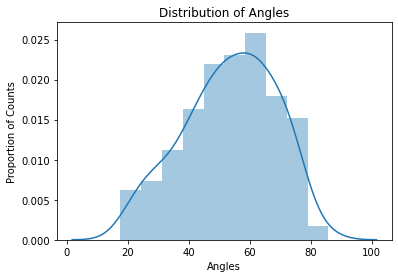

In [44]:
sorted_rr_cities = analyse_cities(within_city_angles_rr)

In [45]:
sorted_rr_cities[0:10]

[('El Dorado', 85.809),
 ('Blacksburg', 85.682),
 ('Sumter', 80.782),
 ('Fremont', 78.881),
 ('Asheville', 78.089),
 ('Ventura', 77.942),
 ('Adrian', 77.775),
 ('Pensacola', 76.993),
 ('Farmington', 76.737),
 ('Orlando', 76.432)]

In [46]:
cities['Orlando']

['Valencia College',
 'University of Central Florida',
 'Adventist University of Health Sciences']

In [47]:
for city_angle in sorted_rr_cities[0:50]:
    city, angle = city_angle
    print(city, angle, len(cities[city]))

El Dorado 85.809 2
Blacksburg 85.682 2
Sumter 80.782 2
Fremont 78.881 2
Asheville 78.089 2
Ventura 77.942 2
Adrian 77.775 2
Pensacola 76.993 2
Farmington 76.737 3
Orlando 76.432 3
Franklin 76.308 3
Baton Rouge 75.932 3
Hartford 75.613 3
Lakewood 74.957 5
Green Bay 74.69 2
Moorhead 74.635 3
Dallas 74.363 5
Greensburg 74.22 2
Lancaster 74.13 5
Grand Rapids 73.902 6
Westminster 73.885 3
Lubbock 73.54 2
Lincoln 73.428 4
Fort Lauderdale 73.119 3
Hayward 73.089 2
Elgin 73.059 2
Long Island City 72.859 2
Flushing 72.848 2
Las Vegas 72.698 3
Dayton 72.57 5
Pasadena 72.06 5
Ann Arbor 72.006 3
La Jolla 71.621 2
Austin 71.294 6
Rocky Mount 70.912 2
Tyler 70.54 3
Bridgeport 70.479 2
El Paso 70.472 2
Longview 70.068 2
Salt Lake City 69.811 5
Chattanooga 69.806 2
Decatur 69.661 5
Aberdeen 68.89 3
Fairfax 68.784 2
San Luis Obispo 68.703 2
Brooklyn 68.463 7
Montgomery 68.429 4
Bryn Mawr 68.424 2
Orange 68.278 3
Weatherford 67.911 2


In [48]:
for city_angle in sorted_rr_cities[200:300]:
    city, angle = city_angle
    print(city, angle, len(cities[city]))

Columbus 41.845 8
River Forest 41.737 2
Charlotte 41.553 3
Atlanta 41.237 10
Greenville 41.11 6
Reading 40.597 3
Louisville 40.517 5
Portland 40.303 12
Bethlehem 40.24 3
Huntsville 39.502 4
New Haven 39.116 4
Worcester 39.068 8
Burlington 38.985 2
Shreveport 38.926 2
Huntington 38.826 2
Lynchburg 38.647 4
Brunswick 38.614 2
Berkeley 37.666 4
University Center 37.533 2
Mount Vernon 36.954 4
Fairfield 36.877 5
Dover 36.623 2
Dubuque 36.607 4
Ashland 35.986 4
Salisbury 35.481 3
Saratoga Springs 34.332 2
New London 34.233 3
Boca Raton 34.003 2
Maryville 32.975 2
Waltham 32.782 2
Wellesley 32.205 2
Georgetown 32.047 2
Harrisonburg 31.916 2
Orangeburg 31.843 2
Monmouth 31.465 2
Purchase 31.366 2
Erie 31.298 2
Mobile 29.951 3
Clinton 29.663 3
Lexington 29.449 5
Tacoma 28.788 5
Kenosha 28.474 3
Terre Haute 28.078 2
Houghton 27.766 2
Claremont 27.571 6
Fort Worth 26.445 4
Miami 26.104 3
Potsdam 25.9 2
Bridgewater 24.824 2
Scranton 24.475 3
Hanover 24.265 2
Providence 24.088 4
Evansville 23.963 

In [104]:
x_city_pops = []
y_city_rrs = []

In [105]:
for city in within_city_angles_rr:
    if city in city_pops and within_city_angles_rr[city] > 0:
        x_city_pops.append(city_pops[city])
        y_city_rrs.append(within_city_angles_rr[city])
        print(city, city_pops[city])

Athens 23832
Jackson 173514
Tuscaloosa 90468
Albany 97856
Seattle 608660
Houston 2099451
Waltham 60632
Denver 600158
Los Angeles 3792621
San Jose 945942
Detroit 713777
San Antonio 1327407
Orlando 238300
Bellevue 122363
Tyler 96900
Chicago 2695598
Wilkes-Barre 41498
Evansville 117429
Charlotte 731424
New Orleans 343829
Huntsville 180105
San Marcos 83781
Austin 790390
Irvine 212375
Richmond 204214
Tampa 335709
Springfield 159498
Champaign 81055
Baltimore 620961
Gainesville 124354
Washington 601723
Syracuse 145170
Fort Lauderdale 165521
Knoxville 178874
Charleston 120083
Scranton 76089
Cleveland 396815
Milwaukee 594833
Tucson 520116
Ann Arbor 113934
Abilene 117063
Durham 228330
Salem 154637
Salisbury 33662
Tulsa 391906
Pittsburgh 305704
Madison 233209
New York 8175133
Bethlehem 74982
Tallahassee 181376
Wilmington 106476
Cambridge 105162
Florence 39319
Arlington 365438
Atlanta 420003
Grand Rapids 188040
Memphis 646889
Las Vegas 583756
Pomona 149058
Newark 277140
Bloomington 82893
Ithaca 30

In [107]:
x_city_pops = []
y_city_tts = []

In [108]:
for city in within_city_angles_tt:
    if city in city_pops and within_city_angles_tt[city] > 0:
        x_city_pops.append(city_pops[city])
        y_city_tts.append(within_city_angles_tt[city])
        print(city, city_pops[city])

Athens 23832
Union 8393
Jackson 173514
Tuscaloosa 90468
Albany 97856
Seattle 608660
Houston 2099451
Waltham 60632
Bowling Green 58067
Denver 600158
Los Angeles 3792621
Waco 124805
San Jose 945942
Detroit 713777
San Antonio 1327407
Laredo 236091
Orlando 238300
Bellevue 122363
Tyler 96900
Chicago 2695598
Wilkes-Barre 41498
Evansville 117429
Charlotte 731424
New Orleans 343829
Huntsville 180105
Denton 113383
San Marcos 83781
Austin 790390
Irvine 212375
Richmond 204214
Tampa 335709
Springfield 159498
Champaign 81055
Baltimore 620961
Gainesville 124354
Washington 601723
Syracuse 145170
Fort Lauderdale 165521
Knoxville 178874
Charleston 120083
Santa Monica 89736
Scranton 76089
Cleveland 396815
Milwaukee 594833
Tucson 520116
Ann Arbor 113934
Mount Pleasant 26016
Abilene 117063
Durham 228330
Victoria 62592
Salem 154637
Salisbury 33662
Tulsa 391906
Pittsburgh 305704
Madison 233209
Pittsburg 20233
Santa Clara 116468
New York 8175133
Bethlehem 74982
Tallahassee 181376
Wilmington 106476
Cambridge 

In [79]:
import matplotlib.pyplot as plt

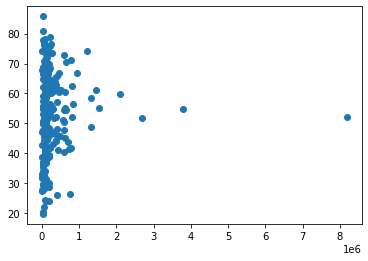

In [91]:
plt.scatter(x_city_pops, y_city_rrs)

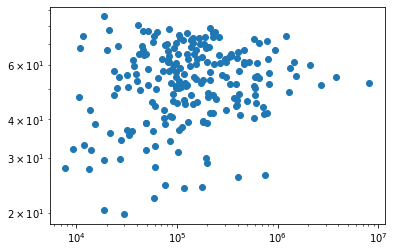

In [92]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(x_city_pops, y_city_rrs)

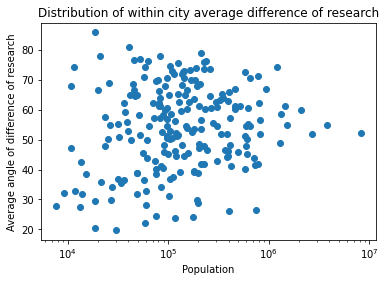

In [106]:
plt.xscale('log')
plt.title('Distribution of within city average difference of research')
plt.xlabel('Population')
plt.ylabel('Average angle of difference of research')
plt.scatter(x_city_pops, y_city_rrs)

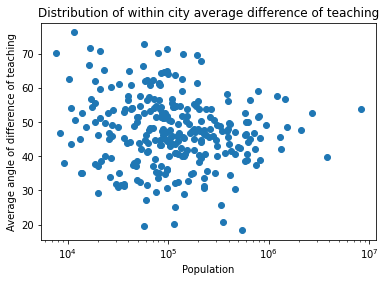

In [109]:
plt.xscale('log')
plt.title('Distribution of within city average difference of teaching')
plt.xlabel('Population')
plt.ylabel('Average angle of difference of teaching')
plt.scatter(x_city_pops, y_city_tts)

### Scaling with count of papers, unis, syllabi



In [54]:
unis_per_city = []

In [55]:
pop_per_city = []

In [56]:
for city in cities:
    try:
        pop_per_city.append(city_pops[city])
        unis_per_city.append(len(cities[city]))
    except KeyError:
        print(city)
        continue


University
Los Altos Hills
Parkville
Commerce
College Park
Clemson
Kaneohe
Adelphi
Okmulgee
Powell
Saratoga Springs
Imperial
Azusa
La Jolla
Oberlin
Fairfax
Canyon
Bennington
Godfrey
Normal
Alvin
Lake Worth
Ellisville
Culver City
West Windsor
Coral Gables
Texas City
Latrobe
Rohnert Park
Berrien Springs
Stony Brook
Saint George
Allendale
Honolulu
Clarendon
Chapel Hill
Marylhurst
Reedley
Lincroft
Rochester Hills
Princeton
Bronx
Westfield
Montreat
Saint Louis
Gambier
Poplarville
Chestnut Hill
Ridgecrest
Blacksburg
Incline Village
The Woodlands
Williamstown
North Dartmouth
Marianna
Geneseo
Louisville
Hanover
Niceville
Mission Viejo
Crookston
Alpine
Winter Park
Notre Dame
Silver City
Glenwood Springs
Prairie View
Auburn University
University Park
Kilgore
Boise
Nelsonville
Brockport
Morrow
Farmville
Bel Air
Presque Isle
New Wilmington
Edmond
Sylmar
Rocklin
Rancho Cucamonga
Saint Leo
Pemberton
Winston Salem
Grinnell
New Paltz
Shippensburg
Kutztown
Amherst
Winsted
Gardner
Stanford
Edinboro
West

In [57]:
import matplotlib.pyplot as plt

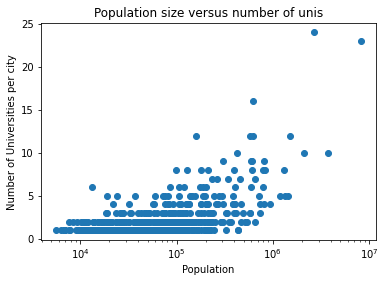

In [31]:
plt.xscale('log')
plt.title('Population size versus number of unis')
plt.xlabel('Population')
plt.ylabel('Number of Universities per city')
plt.scatter(pop_per_city, unis_per_city)

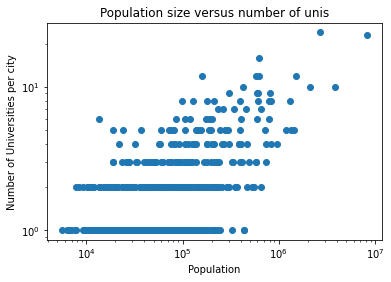

In [58]:
plt.xscale('log')
plt.yscale('log')
plt.title('Population size versus number of unis')
plt.xlabel('Population')
plt.ylabel('Number of Universities per city')
plt.scatter(pop_per_city, unis_per_city)

In [39]:
papers_per_city = []
pop_per_city = []

In [40]:
for city in city_pops:
    try:
        papers_per_city.append(research_cities[city][2])
        pop_per_city.append(city_pops[city])

    except KeyError:
        print(city)
        continue

Albany city
Anderson city
Sandy Springs
Delano
Barnstable Town
Bloomington city
Boise City
Burlington city
South Burlington
Fort Myers
Charleston city
North Charleston
Cleveland city
Coeur d'Alene
College Station
Columbia city
Columbus city
Crestview
Fort Walton Beach
Fort Worth
Danville city
Rock Island
Decatur city
Deltona
West Des Moines
Troy city
Fayetteville city, AR
Florence city
Fort Collins
Fort Smith
Fort Wayne
Gainesville city
Easley
Greenville city
Mauldin
Middletown city
Jackson city
Jacksonville city
Overland Park
Kansas City city, MO
Bristol city, VA
Lafayette city
Lake Havasu City
East Lansing
Auburn city
Lewiston city
Longview city
Monterey Park
Chowchilla
North Mankato
Pharr
Fort Lauderdale
West Palm Beach
West Allis
Bloomington city, MN
St. Paul
Monroe city
Norton Shores
Conway city
North Myrtle Beach
Marco Island
North Port
San Buenaventura (Ventura)
Lynn Haven
Marietta city, OH
Glendale city
Portland city
Port St. Lucie
Rochester city
St. Cloud
St. George
St. Joseph

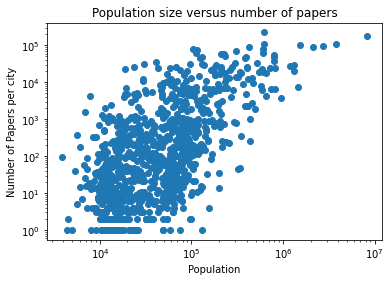

In [41]:
plt.xscale('log')
plt.yscale('log')
plt.title('Population size versus number of papers')
plt.xlabel('Population')
plt.ylabel('Number of Papers per city')
plt.scatter(pop_per_city, papers_per_city)

In [50]:
syllabi_per_city = []
pop_per_city = []

In [53]:
list(teaching_cities.keys())[:100]

['Angelo State University',
 'University of Mississippi',
 'Tufts University',
 'Foothill College',
 'University of Georgia',
 'Kean University',
 'Jackson College',
 'The University of Alabama',
 'Lansing Community College',
 'New Mexico Junior College',
 'University of West Georgia',
 'Park University',
 'Stephen F Austin State University',
 'Excelsior College',
 'Galveston College',
 'North Seattle College',
 'Houston Community College',
 'Texas A & M University-Commerce',
 'University of Maryland-College Park',
 'Clemson University',
 'Brandeis University',
 'The University of Montana',
 'Western Kentucky University',
 'Brigham Young University-Provo',
 'University of Denver',
 'Windward Community College',
 'University of Maryland-University College',
 'Oklahoma State University Institute of Technology',
 'University of Southern California',
 'South Plains College',
 'McLennan Community College',
 'San Jose State University',
 'Wayne State University',
 'The University of Texas at

In [51]:
for city in city_pops:
    try:
        syllabi_per_city.append(teaching_cities[city][2])
        pop_per_city.append(city_pops[city])

    except KeyError:
        print(city)
        continue

Abilene
Akron
Albany
Albany city
Schenectady
Troy
Albuquerque
Alexandria
Allentown
Bethlehem
Altoona
Amarillo
Ames
Anderson
Anderson city
Ann Arbor
Anniston
Oxford
Appleton
Asheville
Atlanta
Marietta
Sandy Springs
Atlantic City
Auburn
Opelika
Austin
Round Rock
San Marcos
Bakersfield
Delano
Baltimore
Bangor
Barnstable Town
Baton Rouge
Battle Creek
Bay City
Beaumont
Port Arthur
Bellingham
Bend
Billings
Binghamton
Birmingham
Hoover
Bismarck
Radford
Bloomington
Bloomington city
Boise City
Nampa
Boston
Cambridge
Newton
Peabody
Quincy
Waltham
Boulder
Bowling Green
Bremerton
Bridgeport
Danbury
Norwalk
Stamford
Brownsville
Harlingen
Brunswick
Buffalo
Niagara Falls
Burlington
Burlington city
South Burlington
Canton
Massillon
Cape Coral
Fort Myers
Cape Girardeau
Jackson
Casper
Cedar Rapids
Champaign
Urbana
Charleston
Charleston city
North Charleston
Charlotte
Concord
Gastonia
Rock Hill
Charlottesville
Chattanooga
Cheyenne
Chicago
Des Plaines
Elgin
Evanston
Joliet
Naperville
Gary
Chico
Cincinnati

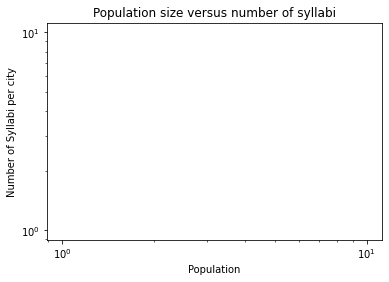

In [49]:
plt.xscale('log')
plt.yscale('log')
plt.title('Population size versus number of syllabi')
plt.xlabel('Population')
plt.ylabel('Number of Syllabi per city')
plt.scatter(pop_per_city, syllabi_per_city)

In [52]:
syllabi_per_city

[]